In [34]:
import pandas as pd
import matplotlib.pyplot as plt

Imported the required libraries.

In [2]:
df = pd.read_csv("train_final_cleaned.csv")

Loaded the dataset from file.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   City           9800 non-null   object 
 9   State          9800 non-null   object 
 10  Postal Code    9800 non-null   int64  
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales          9800 non-null   float64
dtypes: float64(1), int64(2), object(14)
memory usage: 1.

Checked the dataset information

In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

Changed the datatype of Order Date and Ship Date from object to datetime

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal Code    9800 non-null   int64         
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub-Category   9800 non-null   object        
 15  Product Name   9800 n

Again checked the dataframe info to confirm whether the datatype is converted

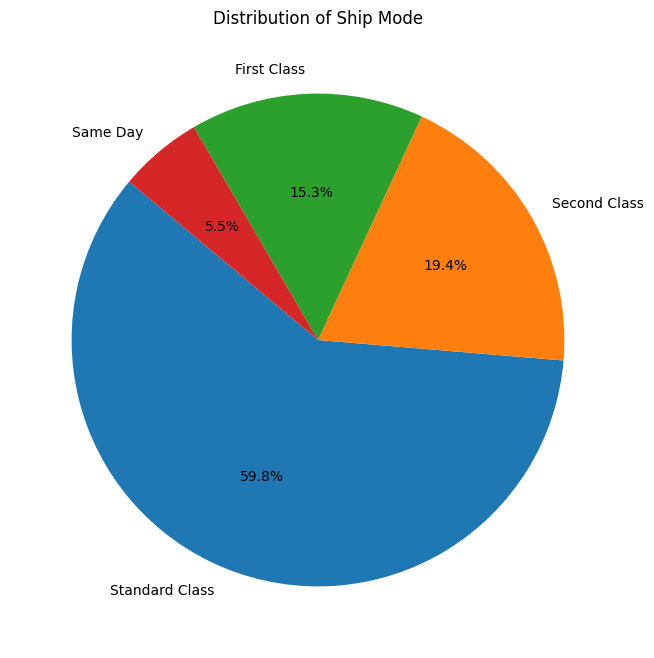

In [10]:
ship_mode_counts = df['Ship Mode'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(ship_mode_counts, labels=ship_mode_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ship Mode')
plt.show()

We created a variable ship_mode_count and stored the count of various ship modes in it.

Then we have drawn a pie chart demonstrating various shipping modes which is an example of **"UNIVARIATE ANALYSIS"**

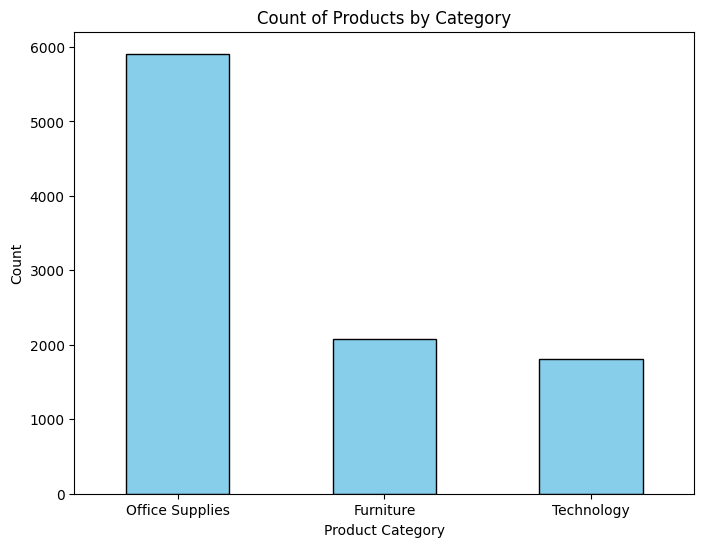

In [11]:
category_counts = df['Category'].value_counts()
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of Products by Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Created bar chart for count of products by category. This is also **UNIVARIATE ANALYSIS**

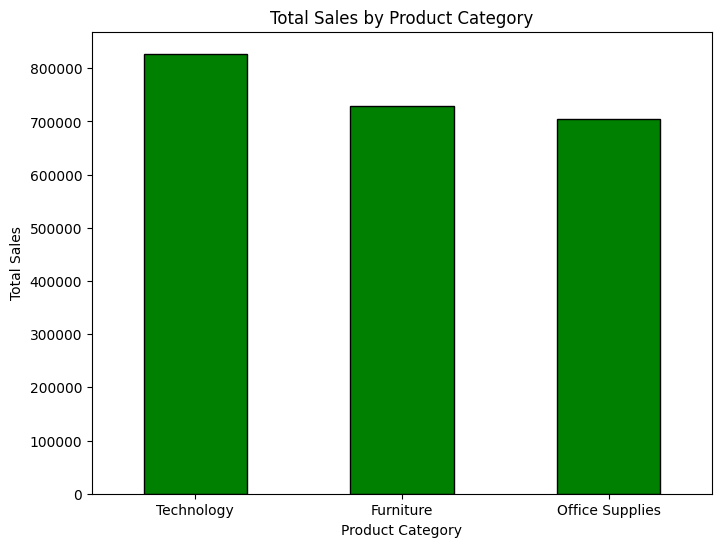

In [21]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
category_sales.plot(kind='bar', color='green', edgecolor='black')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

Bar chart for Total Sales by Category. Which is an example of **BIVARIATE ANALYSIS**. It is interesting to note that the count of products in the Technology category is the least but the total sales is highest.

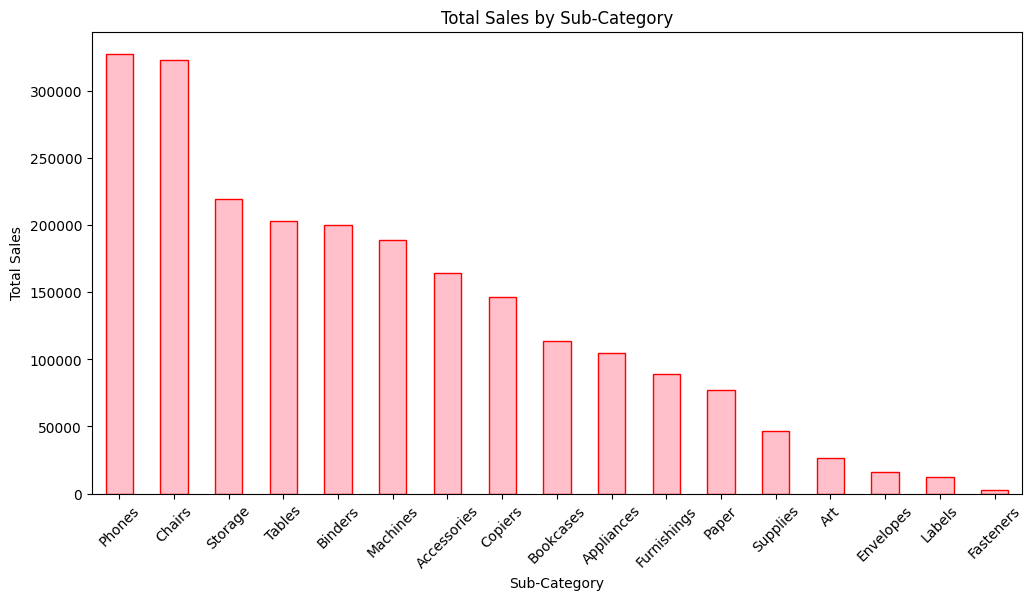

In [22]:
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
subcategory_sales.plot(kind='bar', color='pink', edgecolor='red')
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

**BIVARIATE ANALYSIS** - Total Sales by Sub-Catergory
We also rotated the bar labels to 45 degrees for better visibility.

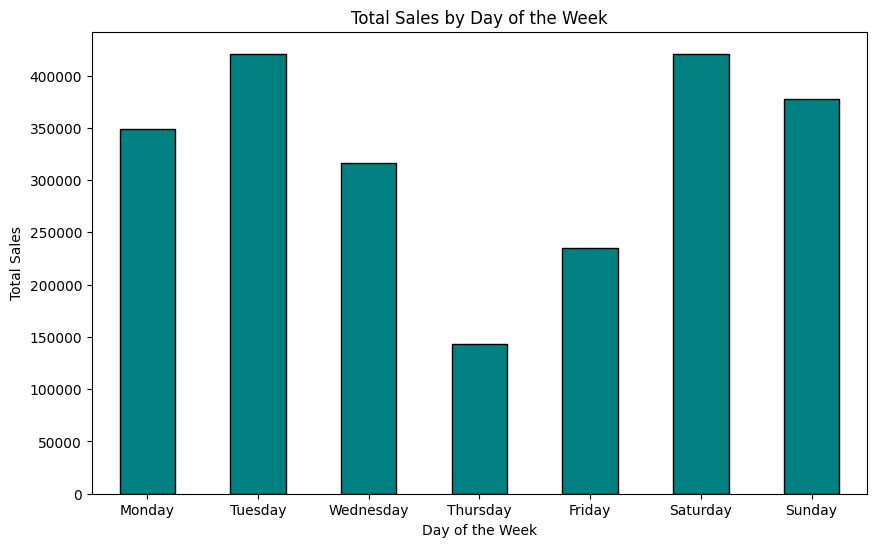

In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Day of Week'] = df['Order Date'].dt.day_name()

sales_by_day = df.groupby('Day of Week')['Sales'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(10, 6))
sales_by_day.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

**TIME SERIES ANALYSIS** - Total Sales by Day of the Week

<ipython-input-20-e7750b926ea0>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

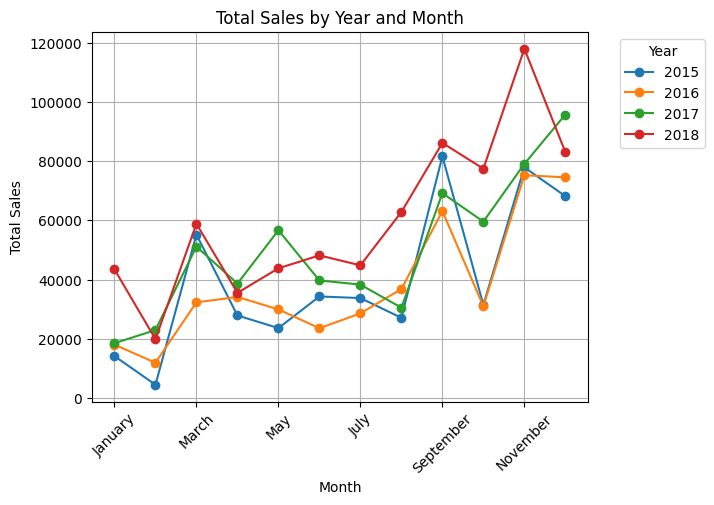

In [20]:
df['Order Date'] = pd.to_datetime(df['Order Date'])


df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)


monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
monthly_sales.T.plot(kind='line', marker='o')
plt.title('Total Sales by Year and Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

**TIME SERIES ANALYSIS** - Line Graph showing Total Sales of Each Year Month-wise

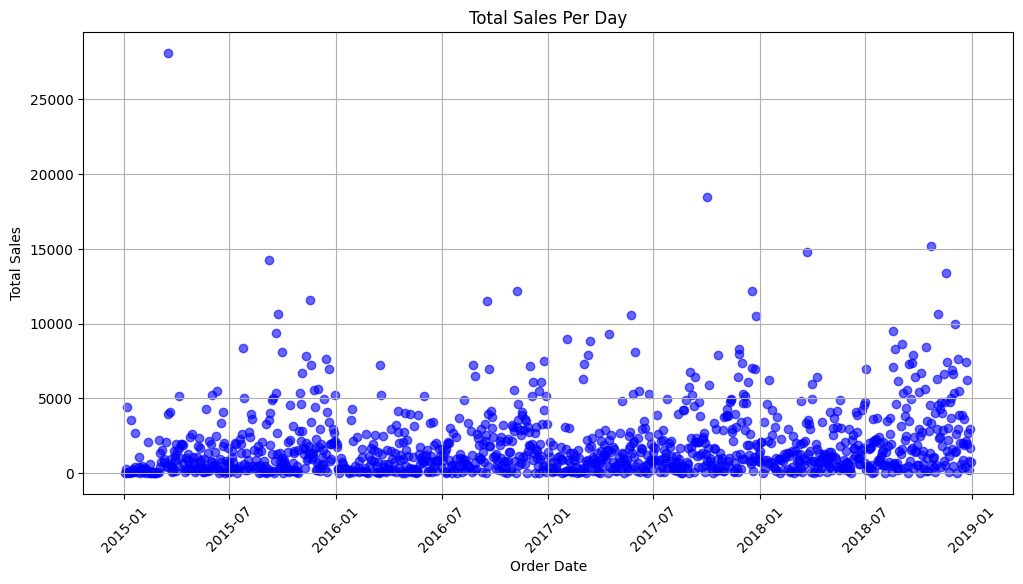

In [26]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.scatter(daily_sales['Order Date'], daily_sales['Sales'], color='blue', alpha=0.6)
plt.title('Total Sales Per Day')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.show()

BIVARIATE ANAYSIS - Scatter Plot showing day-wise total sales

In [30]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df['Delivery Time'] = df['Ship Date'] - df['Order Date']

print(df[['Order Date', 'Ship Date', 'Delivery Time']].head())

  Order Date  Ship Date Delivery Time
0 2017-11-08 2017-11-11        3 days
1 2017-11-08 2017-11-11        3 days
2 2017-06-12 2017-06-16        4 days
3 2016-10-11 2016-10-18        7 days
4 2016-10-11 2016-10-18        7 days


Calculated Delivery Time

In [31]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df['Delivery Time'] = df['Ship Date'] - df['Order Date']

df['Delivery Time (Days)'] = df['Delivery Time'].dt.days

Q1 = df['Delivery Time (Days)'].quantile(0.25)
Q3 = df['Delivery Time (Days)'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['Delivery Time (Days)'] >= lower_bound) & (df['Delivery Time (Days)'] <= upper_bound)]

original_shape = df.shape
new_shape = df_no_outliers.shape

original_shape, new_shape

((9800, 22), (9800, 22))

The dataset doesn't have outliers.

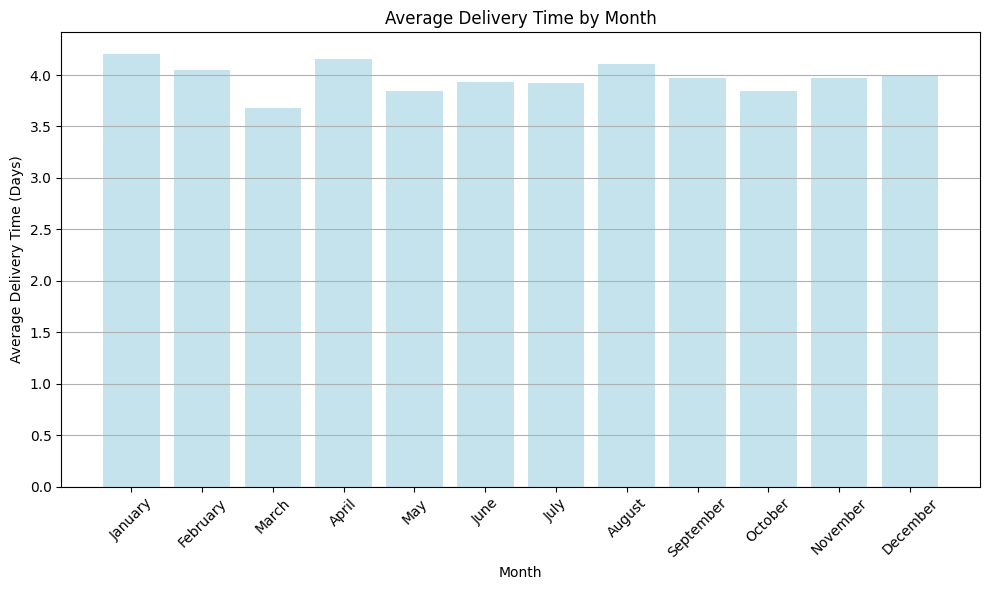

In [33]:
df['Month'] = df['Order Date'].dt.month_name()  # Get month names

# Group by Month and calculate average delivery time
monthly_avg_delivery_time = df.groupby('Month')['Delivery Time (Days)'].mean().reset_index()

# Create a month order for proper sorting
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'Month' to a categorical type with the specified order
monthly_avg_delivery_time['Month'] = pd.Categorical(monthly_avg_delivery_time['Month'], categories=month_order, ordered=True)

# Sorting by Month for plotting
monthly_avg_delivery_time = monthly_avg_delivery_time.sort_values('Month')

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg_delivery_time['Month'], monthly_avg_delivery_time['Delivery Time (Days)'], color='lightblue', alpha=0.7)
plt.title('Average Delivery Time by Month')
plt.xlabel('Month')
plt.ylabel('Average Delivery Time (Days)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

Average Delivery Time is quite constant in different months which is around 4 days.